<a href="https://colab.research.google.com/github/MinakoNG63/DSFB/blob/main/12_Feature_Transformation_Continuous__Numeric_Data_63070240.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering (Feature Transformation) on Continuous Numeric Data

Term 1 2022 - Instructor: Teerapong Leelanupab

Teaching Assistant:
1. Piyawat Chuangkrud (Sam)
2. Suvapat Manu (Mint)

***

Credit: Dipanjan (DJ) Sarkar, [Continuous Numeric Data](https://towardsdatascience.com/understanding-feature-engineering-part-1-continuous-numeric-data-da4e47099a7b)
***

In [ ]:
#---------------------------------
#download files จาก google drive
#---------------------------------
#download Pokemon.csv
!gdown --id 18Q4wKu6jUC6ZXtENtwJ0lWpNyn13wjcR

#download song_views.csv
!gdown --id 1sgrnzlKIcFlfkP91ZvoodSFKObVuBvfu

#download item_popularity.csv
!gdown --id 1_CVXCdgyWg2nVJ09t_4ndmiEVyUeRoob

#download fcc_2016_coder_survey_subset.csv
!gdown --id 1tnkWZ2fzaz_YRaa7LNqNEnrfMjpvNH6-

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=18Q4wKu6jUC6ZXtENtwJ0lWpNyn13wjcR
To: /content/Pokemon.csv
100% 47.2k/47.2k [00:00<00:00, 55.5MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1sgrnzlKIcFlfkP91ZvoodSFKObVuBvfu
To: /content/song_views.csv
100% 28.2k/28.2k [00:00<00:00, 36.7MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: 

# Transform Continuous Numeric Attributes


There is the need for engineering meaningful features from raw data is of utmost importance which can be understood and consumed by any machine learning, deep learning or statistical algorithms.

**Feature Transformation** is an essential part of Feature Engineering to build any intelligent system. Even though you have a lot of newer methodologies coming in like *deep learning( and *meta-heuristics* which aid in automated machine learning, each problem is domain specific and better features (suited to the problem) is often the deciding factor of the performance of your system.

Feature Transformation is an art as well as a science and this is the reason Data Scientists often spend 70% of their time in the data preparation phase before modeling. This basically reinforces what we mentioned earlier about data scientists spending close to 70-80% of their time in engineering features which is a difficult and time-consuming process, requiring both domain knowledge and mathematical computations.

## Understanding Features

A *feature* is typically a specific representation on top of raw data, which is an individual, measurable attribute, typically depicted by a column in a dataset. Considering a generic two-dimensional dataset, each observation is depicted by a row and each feature by a column, which will have a specific value for an observation.

<figure>
<center>
<img src='https://www.it.kmitl.ac.th/~teerapong/Exxon/Week1/images/Lab31_generic_data.png' alt='A generic dataset snapshot'/>
<figcaption><em>Fig. 1: A generic dataset snapshot</em></figcaption></center>
</figure>


Thus like in the example in the figure above, each row typically indicates a feature vector and the entire set of features across all the observations forms a two-dimensional feature matrix also known as a feature-set. This is akin to data frames or spreadsheets representing two-dimensional data. Typically machine learning algorithms work with these numeric matrices or tensors and hence most feature engineering techniques deal with converting raw data into some numeric representations which can be easily understood by these algorithms.

Features can be of two major types based on the dataset. Inherent **raw features** are obtained directly from the dataset with no extra data manipulation or engineering. **Derived or engineered features** are usually obtained from feature engineering, where we extract features from existing data attributes. A simple example would be creating a new feature “Age” from an employee dataset containing “Birthdate” by just subtracting their birth date from the current date.

There are diverse types and formats of data including structured and unstructured data. In this article, we will discuss various feature engineering strategies for dealing with structured continuous numeric data. All these examples are a part of one of *Dipanjan Sarkar's* recent books ‘[*Practical Machine Learning with Python*](https://github.com/dipanjanS/practical-machine-learning-with-python)’ and you can access relevant datasets and code used in this article on [GitHub](https://github.com/dipanjanS/practical-machine-learning-with-python/tree/master/notebooks/Ch04_Feature_Engineering_and_Selection#chapter-4-feature-engineering-and-selection). A big shout out also goes to Gabriel Moreira who helped me by providing some excellent pointers on feature engineering techniques.

### Feature Transformation on Numeric Data

Numeric data typically represents data in the form of scalar values depicting observations, recordings or measurements. Here, by numeric data, we mean **continuous data** and not discrete data which is typically represented as categorical data. Numeric data can also be represented as a vector of values where each value or entity in the vector can represent a specific feature. Integers and floats are the most common and widely used numeric data types for continuous numeric data. Even though numeric data can be directly fed into machine learning models, you would still need to engineer features which are relevant to the scenario, problem and domain before building a model. Hence the need for feature engineering still remains. Let’s leverage python and look at some strategies for feature engineering on numeric data.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as spstats
%matplotlib inline

#### Raw Measures

Like we mentioned earlier, raw numeric data can often be fed directly to machine learning models based on the context and data format. Raw measures are typically indicated using numeric variables directly as features without any form of transformation or engineering. Typically these features can indicate values or counts. Let’s load up one of our datasets, the [Pokémon](https://www.kaggle.com/abcsds/pokemon/data) dataset also available on Kaggle.

In [ ]:
poke_df = pd.read_csv('Pokemon.csv', encoding='utf-8')
poke_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,Gen 1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,Gen 1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,Gen 1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,Gen 1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,Gen 1,False


Pokémon is a huge media franchise surrounding fictional characters called Pokémon which stands for pocket monsters. In short, you can think of them as fictional animals with superpowers! This dataset consists of these characters with various statistics for each character.

##### Values

If you closely observe the data frame snapshot in the above figure, you can see that several attributes represent numeric raw values which can be used directly. The following snippet depicts some of these features with more emphasis.

In [ ]:
poke_df[['HP', 'Attack', 'Defense']].head()

,HP,Attack,Defense
0,45,49,49
1,60,62,63
2,80,82,83
3,80,100,123
4,39,52,43


Thus, you can directly use these attributes as features which are depicted in the above data frame. These include each Pokémon’s HP (Hit Points), Attack and Defense stats. In fact, we can also compute some basic statistical measures on these fields.

In [ ]:
poke_df[['HP', 'Attack', 'Defense']].describe()

,HP,Attack,Defense
count,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500
std,25.534669,32.457366,31.183501
min,1.000000,5.000000,5.000000
25%,50.000000,55.000000,50.000000
50%,65.000000,75.000000,70.000000
75%,80.000000,100.000000,90.000000
max,255.000000,190.000000,230.000000


With this you can get a good idea about statistical measures in these features like count, average, standard deviation and quartiles.

#### Counts

Another form of raw measures include features which represent frequencies, counts or occurrences of specific attributes. Let’s look at a sample of data from the [millionsong](http://millionsongdataset.com/) dataset which depicts counts or frequencies of songs which have been heard by various users.


In [ ]:
popsong_df = pd.read_csv('song_views.csv',  encoding='utf-8')
popsong_df.head(10)

,user_id,song_id,title,listen_count
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0
5,68f0359a2f1cedb0d15c98d88017281db79f9bc6,SOBONKR12A58A7A7E0,You're The One,0
6,116a4c95d63623a967edf2f3456c90ebbf964e6f,SOBONKR12A58A7A7E0,You're The One,17
7,45544491ccfcdc0b0803c34f201a6287ed4e30f8,SOBONKR12A58A7A7E0,You're The One,0
8,e701a24d9b6c59f5ac37ab28462ca82470e27cfb,SOBONKR12A58A7A7E0,You're The One,68
9,edc8b7b1fd592a3b69c3d823a742e1a064abec95,SOBONKR12A58A7A7E0,You're The One,0


It is quite evident from the above snapshot that the listen_count field can be used directly as a frequency\count based numeric feature.

#### **Binarization**

Often raw frequencies or counts may not be relevant for building a model based on the problem which is being solved. For instance if I’m building a recommendation system for song recommendations, I would just want to know if a person is interested or has listened to a particular song. This doesn’t require the number of times a song has been listened to since I am more concerned about the various songs he\she has listened to. In this case, a binary feature is preferred as opposed to a count based feature. We can binarize our `listen_count` field as follows.

In [ ]:
watched = np.array(popsong_df['listen_count'])
watched[watched >= 1] = 1
popsong_df['watched'] = watched
popsong_df.head(10)

,user_id,song_id,title,listen_count,watched
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2,1
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0,0
5,68f0359a2f1cedb0d15c98d88017281db79f9bc6,SOBONKR12A58A7A7E0,You're The One,0,0
6,116a4c95d63623a967edf2f3456c90ebbf964e6f,SOBONKR12A58A7A7E0,You're The One,17,1
7,45544491ccfcdc0b0803c34f201a6287ed4e30f8,SOBONKR12A58A7A7E0,You're The One,0,0
8,e701a24d9b6c59f5ac37ab28462ca82470e27cfb,SOBONKR12A58A7A7E0,You're The One,68,1
9,edc8b7b1fd592a3b69c3d823a742e1a064abec95,SOBONKR12A58A7A7E0,You're The One,0,0


Alternatively, you can also use scikit-learn's `Binarizer` class here from its `preprocessing` module to perform the same task instead of `numpy` arrays.

In [ ]:
from sklearn.preprocessing import Binarizer
bn = Binarizer(threshold=0.9)
pd_watched = bn.transform([popsong_df['listen_count']])[0]
popsong_df['pd_watched'] = pd_watched
popsong_df.head(10)

,user_id,song_id,title,listen_count,watched,pd_watched
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2,1,1
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0,0,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0,0,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0,0,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0,0,0
5,68f0359a2f1cedb0d15c98d88017281db79f9bc6,SOBONKR12A58A7A7E0,You're The One,0,0,0
6,116a4c95d63623a967edf2f3456c90ebbf964e6f,SOBONKR12A58A7A7E0,You're The One,17,1,1
7,45544491ccfcdc0b0803c34f201a6287ed4e30f8,SOBONKR12A58A7A7E0,You're The One,0,0,0
8,e701a24d9b6c59f5ac37ab28462ca82470e27cfb,SOBONKR12A58A7A7E0,You're The One,68,1,1
9,edc8b7b1fd592a3b69c3d823a742e1a064abec95,SOBONKR12A58A7A7E0,You're The One,0,0,0


You can clearly see from the above snapshot that `both the methods` have produced `the same result`. Thus we get a binarized feature indicating if the song was listened to or not by each user which can be then further used in a relevant model.

#### **Rounding** (Convert to **Integer**)

Often when dealing with continuous numeric attributes like proportions or percentages, we may not need the raw values having a high amount of precision. Hence it often makes sense to **round off** these high precision percentages into numeric **integers**. These integers can then be directly used as raw values or even as categorical (discrete-class based) features. Let’s try applying this concept in a dummy dataset depicting store items and their popularity percentages.

In [ ]:
items_popularity = pd.read_csv('item_popularity.csv',  encoding='utf-8')
items_popularity

,item_id,pop_percent
0,it_01345,0.98324
1,it_03431,0.56123
2,it_04572,0.12098
3,it_98021,0.35476
4,it_01298,0.92101
5,it_90120,0.81212
6,it_10123,0.56502


Based on the below examples, you can guess that we tried two forms of rounding. The features depict the item popularities now both on a scale of 1–10 and on a scale of 1–100. You can use these values both as numerical or categorical features based on the scenario and problem.

In [ ]:
items_popularity['popularity_scale_10'] = np.array(np.round((items_popularity['pop_percent'] * 10)),dtype='int')
items_popularity['popularity_scale_100'] = np.array(np.round((items_popularity['pop_percent'] * 100)), dtype='int')
items_popularity

,item_id,pop_percent,popularity_scale_10,popularity_scale_100
0,it_01345,0.98324,10,98
1,it_03431,0.56123,6,56
2,it_04572,0.12098,1,12
3,it_98021,0.35476,4,35
4,it_01298,0.92101,9,92
5,it_90120,0.81212,8,81
6,it_10123,0.56502,6,57


#### **Interactions**
Supervised machine learning models usually try to model the output responses (discrete classes or continuous values) as a function of the input feature variables. For example, a simple linear regression equation can be depicted as


$y=c_{1}x_{1}+c_{2}x_{2}+...+c_{n}x_{n}$ where the input features are depicted by variables $\{x_{1},x_{2},...,x_{n}\}$ having weights or coefficients denoted by $\{c_{1},c_{2},...,c_{n}\}$ respectively and the goal is to predict the response $y$.

<br />

In this case, this simple linear model depicts the relationship between the output and inputs, purely based on the individual, separate input features.

However, often in several real-world scenarios, it makes sense to also try and capture the interactions between these feature variables as a part of the input feature set. A simple depiction of the extension of the above linear regression formulation with interaction features would be


$y=c_{1}x_{1}+c_{2}x_{2}+...+c_{n}x_{n}+c_{11}x_{1}^{2}+c_{22}x_{2}^{2}+c_{12}x_{1}x_{2}+...$ where the features represented by $\{x_{1},x_{2},x_{1}^{2},x_{2}^{2},x_{1}x_{2},...\}$ denote the interaction features. Let’s try engineering some interaction features on our **Pokémon** dataset now.
<br /><br />

#### More explanation about interaction
[https://christophm.github.io/interpretable-ml-book/interaction.html](https://christophm.github.io/interpretable-ml-book/interaction.html)

[https://pycaret.org/feature-interaction/](https://pycaret.org/feature-interaction/)


In [ ]:
atk_def = poke_df[['Attack', 'Defense']]
atk_def.head()

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43


From the output data frame, we can see that we have two numeric (continuous) features, `Attack` and `Defence`. We will now build features up to the 2nd degree by leveraging scikit-learn.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
res = pf.fit_transform(atk_def)
res

array([[   49.,    49.,  2401.,  2401.,  2401.],
       [   62.,    63.,  3844.,  3906.,  3969.],
       [   82.,    83.,  6724.,  6806.,  6889.],
       ...,
       [  110.,    60., 12100.,  6600.,  3600.],
       [  160.,    60., 25600.,  9600.,  3600.],
       [  110.,   120., 12100., 13200., 14400.]])

The above feature matrix depicts a total of five features including the new interaction features. We can see the degree of each feature (i.e., $x_1$ and $x_2$) in the above matrix, $\{ x_1, x_2, x_1^2, x_1x_2, x_2^2\}$, as follows.

In [ ]:
pd.DataFrame(pf.powers_, columns=['Attack_degree', 'Defense_degree'])

,Attack_degree,Defense_degree
0,1,0
1,0,1
2,2,0
3,1,1
4,0,2


Looking at the above output, we now know what each feature actually represents from the degrees depicted here. Armed with this knowledge, we can assign a name to each feature now as follows. This is just for ease of understanding and you should name your features with better, easy to access and simple names.

In [ ]:
intr_features = pd.DataFrame(res, columns=['Attack', 'Defense', 'Attack^2', 'Attack x Defense', 'Defense^2'])
intr_features.head(5)

,Attack,Defense,Attack^2,Attack x Defense,Defense^2
0,49.0,49.0,2401.0,2401.0,2401.0
1,62.0,63.0,3844.0,3906.0,3969.0
2,82.0,83.0,6724.0,6806.0,6889.0
3,100.0,123.0,10000.0,12300.0,15129.0
4,52.0,43.0,2704.0,2236.0,1849.0


Thus the above data frame represents our original features along with their interaction features.

### **<font color='red'> Binning </font>**
The problem of working with raw, continuous numeric features is that often the distribution of values in these features will be skewed. This signifies that some values will occur quite frequently while some will be quite rare. Besides this, there is also another problem of the varying range of values in any of these features. For instance view counts of specific music videos could be abnormally large ([Despacito](https://www.youtube.com/watch?v=kJQP7kiw5Fk) we’re looking at you!) and some could be really small. Directly using these features can cause a lot of issues and adversely affect the model. Hence there are strategies to deal with this, which include binning and transformations.

`Binning`, also known as `quantization` is used for transforming continuous numeric features into discrete ones (categories). These discrete values or numbers can be thought of as categories or bins into which the raw, continuous numeric values are binned or grouped into. Each bin represents a specific degree of intensity and hence a specific range of continuous numeric values fall into it. Specific strategies of binning data include fixed-width and adaptive binning. Let’s use a subset of data from a dataset extracted from the [2016 FreeCodeCamp Developer\Coder survey](https://github.com/freeCodeCamp/2016-new-coder-survey) which talks about various attributes pertaining to coders and software developers.

In [ ]:
fcc_survey_df = pd.read_csv('fcc_2016_coder_survey_subset.csv', encoding='utf-8')
fcc_survey_df[['ID.x', 'EmploymentField', 'Age', 'Income']].head()

,ID.x,EmploymentField,Age,Income
0,cef35615d61b202f1dc794ef2746df14,office and administrative support,28.0,32000.0
1,323e5a113644d18185c743c241407754,food and beverage,22.0,15000.0
2,b29a1027e5cd062e654a63764157461d,finance,19.0,48000.0
3,04a11e4bcb573a1261eb0d9948d32637,"arts, entertainment, sports, or media",26.0,43000.0
4,9368291c93d5d5f5c8cdb1a575e18bec,education,20.0,6000.0


The ID.x variable is basically a unique identifier for each coder\developer who took the survey and the other fields are pretty self-explanatory.

#### **<font color='red'> Fixed-Width Binning </font>**
Just like the name indicates, in fixed-width binning, we have specific fixed widths for each of the bins which are usually pre-defined by the user analyzing the data. Each bin has a pre-fixed range of values which should be assigned to that bin on the basis of some domain knowledge, rules or constraints. Binning based on rounding is one of the ways, where you can use the rounding operation which we discussed earlier to bin raw values.

Let’s now consider the `Age` feature from the coder survey dataset and look at its distribution

สำหรับข้อมูลที่ไม่มี background

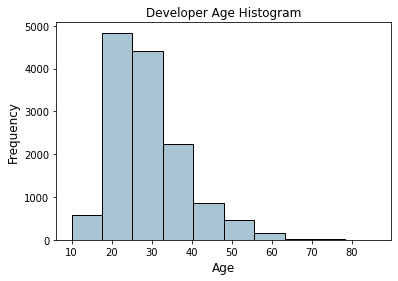

In [ ]:
fig, ax = plt.subplots()
fcc_survey_df['Age'].hist(color='#A9C5D3', edgecolor='black', grid=False)
ax.set_title('Developer Age Histogram', fontsize=12)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.show()

The above histogram depicting developer ages is slightly right skewed as expected (lesser aged developers). We will now assign these raw age values into specific bins based on the following scheme

<figure>
<center>
<img src='https://www.it.kmitl.ac.th/~teerapong/Exxon/Week1/images/Lab31_fixedbin_10.png' alt='Fixed Bin Across Different Age Ranges 10'/>
<figcaption><em>Fig. 2: Fixed Bin Across Different Age Ranges with the Bin Size of 10</em></figcaption></center>
</figure>

We can easily do this using what we learnt in the *Rounding* section earlier where we round off these raw age values by taking the floor value after dividing it by 10.

In [ ]:
fcc_survey_df['Age_bin_round'] = np.array(np.floor(np.array(fcc_survey_df['Age']) / 10.))
fcc_survey_df[['ID.x', 'Age', 'Age_bin_round']].iloc[1071:1076]

,ID.x,Age,Age_bin_round
1071,6a02aa4618c99fdb3e24de522a099431,17.0,1.0
1072,f0e5e47278c5f248fe861c5f7214c07a,38.0,3.0
1073,6e14f6d0779b7e424fa3fdd9e4bd3bf9,21.0,2.0
1074,c2654c07dc929cdf3dad4d1aec4ffbb3,53.0,5.0
1075,f07449fc9339b2e57703ec7886232523,35.0,3.0


You can see the corresponding bins for each age have been assigned based on rounding. But what if we need more flexibility? What if we want to decide and fix the bin widths based on our own rules\logic? Binning based on custom ranges will help us achieve this. Let’s define some custom age ranges for binning developer ages using the following scheme.

<figure>
<center>
<img src='https://drive.google.com/uc?id=1PvztjNbMFWYt0iKYMVjgzWWS0RJsGB5_' alt='Fixed Bin Across Different Age Ranges 15'/>
<figcaption><em>Fig. 3: Fixed Bin Across Different Age Ranges with the Custom Mix Bin Sizes of 15 and 25 and Starting Bin Index from 1</em></figcaption></center>
</figure>

In [ ]:
bin_ranges = [0, 15, 30, 45, 60, 75, 100]
bin_names = [1, 2, 3, 4, 5, 6]
fcc_survey_df['Age_bin_custom_range'] = pd.cut(np.array(fcc_survey_df['Age']), bins=bin_ranges)
fcc_survey_df['Age_bin_custom_label'] = pd.cut(np.array(fcc_survey_df['Age']),  bins=bin_ranges, labels=bin_names)

# view the binned features
fcc_survey_df[['ID.x', 'Age', 'Age_bin_round', 'Age_bin_custom_range', 'Age_bin_custom_label']].iloc[1071:1076]

,ID.x,Age,Age_bin_round,Age_bin_custom_range,Age_bin_custom_label
1071,6a02aa4618c99fdb3e24de522a099431,17.0,1.0,"(15, 30]",2
1072,f0e5e47278c5f248fe861c5f7214c07a,38.0,3.0,"(30, 45]",3
1073,6e14f6d0779b7e424fa3fdd9e4bd3bf9,21.0,2.0,"(15, 30]",2
1074,c2654c07dc929cdf3dad4d1aec4ffbb3,53.0,5.0,"(45, 60]",4
1075,f07449fc9339b2e57703ec7886232523,35.0,3.0,"(30, 45]",3


#### **<font color='red'> Adaptive Binning </font>**
<font color='red'>The drawback in using fixed-width binning is that due to us manually deciding the bin ranges</font>, we can end up with irregular bins which are not uniform based on the number of data points or values which fall in each bin. Some of the bins might be densely populated and some of them might be sparsely populated or even empty! Adaptive binning is a safer strategy in these scenarios where we let the data speak for itself! That’s right, we use the data distribution itself to decide our bin ranges.

**Quantile based binning** is a good strategy to use for adaptive binning. Quantiles are specific values or cut-points which help in partitioning the continuous valued distribution of a specific numeric field into discrete contiguous bins or intervals. Thus, *q-Quantiles* help in partitioning a numeric attribute into *q* equal partitions. Popular examples of quantiles include the *2-Quantile* known as the *median* which divides the data distribution into two equal bins, *4-Quantiles* known as the *quartiles* which divide the data into 4 equal bins and *10-Quantiles* also known as the *deciles* which create 10 equal width bins. Let’s now look at the data distribution for the developer `Income` field.

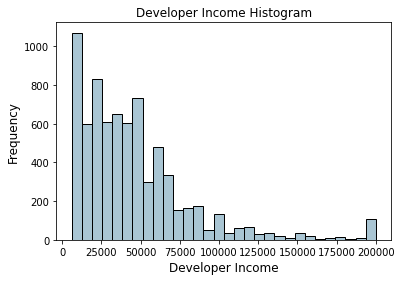

In [ ]:
fig, ax = plt.subplots()
fcc_survey_df['Income'].hist(bins=30, color='#A9C5D3', edgecolor='black', grid=False)
ax.set_title('Developer Income Histogram', fontsize=12)
ax.set_xlabel('Developer Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.show()

The above distribution depicts a right skew in the income with lesser developers earning more money and vice versa. Let’s take a **4-Quantile** or a *quartile* based adaptive binning `scheme`. We can obtain the quartiles easily as follows.

In [ ]:
quantile_list = [0, .25, .5, .75, 1.]
quantiles = fcc_survey_df['Income'].quantile(quantile_list)
quantiles

0.00      6000.0
0.25     20000.0
0.50     37000.0
0.75     60000.0
1.00    200000.0
Name: Income, dtype: float64

Let’s now visualize these quantiles in the original distribution histogram!

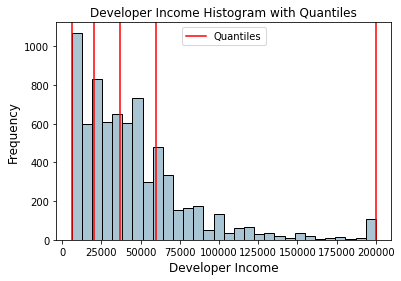

In [ ]:
fig, ax = plt.subplots()
fcc_survey_df['Income'].hist(bins=30, color='#A9C5D3', edgecolor='black', grid=False)
for quantile in quantiles:
    qvl = plt.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)
ax.set_title('Developer Income Histogram with Quantiles', fontsize=12)
ax.set_xlabel('Developer Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.show()

The red lines in the distribution above depict the quartile values and our potential bins. Let’s now leverage this knowledge to build our quartile based binning scheme.

In [ ]:
quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']
fcc_survey_df['Income_quantile_range'] = pd.qcut(fcc_survey_df['Income'], q=quantile_list)
fcc_survey_df['Income_quantile_label'] = pd.qcut(fcc_survey_df['Income'], q=quantile_list, labels=quantile_labels)

fcc_survey_df[['ID.x', 'Age', 'Income', 'Income_quantile_range', 'Income_quantile_label']].iloc[4:9]

,ID.x,Age,Income,Income_quantile_range,Income_quantile_label
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,"(5999.999, 20000.0]",0-25Q
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,"(37000.0, 60000.0]",50-75Q
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,"(20000.0, 37000.0]",25-50Q
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,"(37000.0, 60000.0]",50-75Q
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,"(60000.0, 200000.0]",75-100Q


This should give you a good idea of how quantile based adaptive binning works. An important point to remember here is that the resultant outcome of binning leads to discrete valued categorical features and you might need an additional step of feature engineering on the categorical data before using it in any model. We will cover feature engineering strategies for categorical data shortly in the next part!

### **Statistical Transformations**

We talked about the adverse effects of skewed data distributions briefly earlier. Let’s look at a different strategy of feature engineering now by making use of statistical or mathematical transformations.We will look at the `Log` transform as well as the `Box-Cox` transform. Both of these transform functions belong to the `Power Transform` family of functions, typically used to create monotonic data transformations. Their main significance is that they help in stabilizing variance, adhering closely to the normal distribution and making the data independent of the mean based on its distribution

#### **<font color='red'>Log Transform</font>**

The log transform belongs to the power transform family of functions. This function can be mathematically represented as
$y=\textrm{log}_b(x)$ which reads as log of $x$ to the base $b$ is equal to $y$. This can then be translated into $b^y=x$ which indicates as to what power must the base $b$ be raised to in order to get $x$. The natural logarithm uses $b$=$e$ where $e$ = 2.71828 popularly known as Euler’s number. You can also use base $b$=10 used popularly in the decimal system.


`Log transforms are useful when applied to skewed distributions as they tend to expand the values which fall in the range of lower magnitudes and tend to compress or reduce the values which fall in the range of higher magnitudes.` This tends to make the skewed distribution as normal-like as possible. Let’s use log transform on our **developer Income** feature which we used earlier.

First, let's look at the data distribution on the developer Incomefield now before applying the transformation.

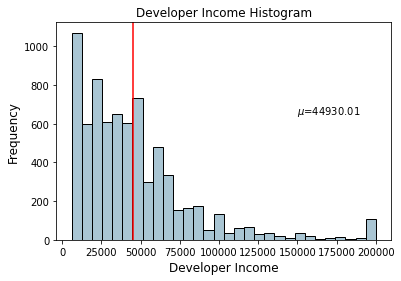

In [ ]:
income_mean = np.round(np.mean(fcc_survey_df['Income']), 2)
fig, ax = plt.subplots()
fcc_survey_df['Income'].hist(bins=30, color='#A9C5D3',
                                 edgecolor='black', grid=False)
plt.axvline(income_mean, color='r')

ax.set_title('Developer Income Histogram',
             fontsize=12)
ax.set_xlabel('Developer Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(150000, 650, r'$\mu$='+str(income_mean), fontsize=10)
plt.show()

In [ ]:
fcc_survey_df['Income_log'] = np.log((1+ fcc_survey_df['Income']))
fcc_survey_df[['ID.x', 'Age', 'Income', 'Income_log']].iloc[4:9]

,ID.x,Age,Income,Income_log
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,8.699681
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,10.596660
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,10.373522
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,10.596660
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,11.289794


The Income_log field depicts the transformed feature after log transformation. Let’s look at the data distribution on this transformed field now.

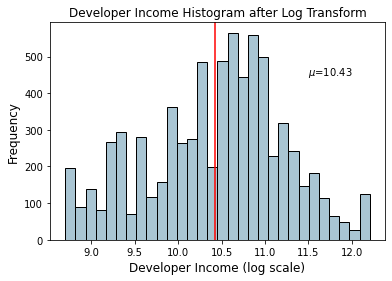

In [ ]:
income_log_mean = np.round(np.mean(fcc_survey_df['Income_log']), 2)
fig, ax = plt.subplots()
fcc_survey_df['Income_log'].hist(bins=30, color='#A9C5D3',
                                 edgecolor='black', grid=False)
plt.axvline(income_log_mean, color='r')
ax.set_title('Developer Income Histogram after Log Transform',
             fontsize=12)
ax.set_xlabel('Developer Income (log scale)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(11.5, 450, r'$\mu$='+str(income_log_mean), fontsize=10)
plt.show()

Based on the above plot, we can clearly see that the distribution is more normal-like or gaussian as compared to the skewed distribution on the original data.

#### **Box-Cox Transform**

The [Box-Cox](https://lonewritings.github.io/notes/2016/05/18/box-cox-transformation.html) transform is another popular function belonging to the power transform family of functions. This function has a pre-requisite that the numeric values to be transformed must be positive (similar to what log transform expects). In case they are negative, shifting using a constant value helps. Mathematically, the Box-Cox transform function can be denoted as follows.

<center>
 $y = f(x,\lambda)= x^{ \lambda  } = \begin{Bmatrix}
 \frac { { x }^{ \lambda} - 1 }{ \lambda} & : \lambda > 0\\
 \textrm{log}_e(x) & : \lambda = 0
\end{Bmatrix} $
</center>

Such that the resulted transformed output $y$ is a function of input $x$ and the transformation parameter $\lambda$ such that when $\lambda = 0$, the resultant transform is the natural log transform which we discussed earlier. The optimal value of $\lambda$ is usually determined using a maximum likelihood or log-likelihood estimation. Let’s now apply the Box-Cox transform on our developer income feature. First we get the **optimal lambda value** from the data distribution by removing the non-null values as follows.

In [ ]:
income = np.array(fcc_survey_df['Income'])
income_clean = income[~np.isnan(income)]
l, opt_lambda = spstats.boxcox(income_clean)
print('Optimal lambda value:', opt_lambda)

Optimal lambda value: 0.11799122497648248


Now that we have obtained the optimal $\lambda$ value, let us use the Box-Cox transform for two values of $\lambda$ such that $\lambda = 0$ and $\lambda = \lambda$ (optimal) and transform the developer Income feature.

In [ ]:
fcc_survey_df['Income_boxcox_lambda_0'] = spstats.boxcox(
                                        (1+fcc_survey_df['Income']),
                                          lmbda=0)
fcc_survey_df['Income_boxcox_lambda_opt'] = spstats.boxcox(
                                            fcc_survey_df['Income'],
                                              lmbda=opt_lambda)

fcc_survey_df[['ID.x', 'Age', 'Income', 'Income_log',
               'Income_boxcox_lambda_0',
               'Income_boxcox_lambda_opt']].iloc[4:9]

,ID.x,Age,Income,Income_log,Income_boxcox_lambda_0,Income_boxcox_lambda_opt
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,8.699681,8.699681,15.180667
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,10.596660,10.596660,21.115340
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,10.373522,10.373522,20.346418
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,10.596660,10.596660,21.115340
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,11.289794,11.289794,23.637128


The transformed features are depicted in the above data frame. Just like we expected, `Income_log` and `Income_boxcox_lamba_0` have the same values. Let’s look at the distribution of the transformed Income feature after transforming with the optimal $\lambda$.

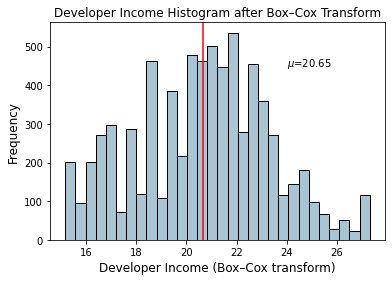

In [ ]:
income_boxcox_mean = np.round(
                      np.mean(
                       fcc_survey_df['Income_boxcox_lambda_opt']),2)
fig, ax = plt.subplots()
fcc_survey_df['Income_boxcox_lambda_opt'].hist(bins=30,
                     color='#A9C5D3', edgecolor='black', grid=False)
plt.axvline(income_boxcox_mean, color='r')
ax.set_title('Developer Income Histogram after Box–Cox Transform',
             fontsize=12)
ax.set_xlabel('Developer Income (Box–Cox transform)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(24, 450, r'$\mu$='+str(income_boxcox_mean), fontsize=10)
plt.show()

The distribution looks more normal-like similar to what we obtained after the *log* transform.

### Conclusion

Feature engineering is a very important aspect of machine learning and data science and should never be ignored. While we have automated feature engineering methodologies like deep learning as well as automated machine learning frameworks like AutoML (which still stresses that it requires good features to work well!). Feature engineering is here to stay and even some of these automated methodologies often require specific engineered features based on the data type, domain and the problem to be solved.

We looked at popular strategies for feature engineering on continuous numeric data in this article. In the next part, we will look at popular strategies for dealing with discrete, categorical data and then move on to unstructured data types in future articles.